In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt
import kalepy as kale

# Cython sorting

meshgrid, defining random h2fdf and bgnum

In [ ]:
M = 2
Q = 1
Z = 3
F = 2
h2fdf = np.zeros((M,Q,Z,F))
bgnum = np.zeros((M,Q,Z,F))
mqz = np.zeros((3,M,Q,Z))
for mm in range(M):
    for qq in range(Q):
        for zz in range(Z):
            mqz[0,mm,qq,zz] = mm
            mqz[1,mm,qq,zz] = qq
            mqz[2,mm,qq,zz] = zz
            for ff in range(F):
                h2fdf[mm,qq,zz,ff] = np.random.uniform(1,10)
                bgnum[mm,qq,zz,ff] = int(np.random.uniform(0,5))
                
print(h2fdf)
print(bgnum)
m_i = np.arange(M) 
q_i = np.arange(Q)
z_i = np.arange(Z)
m_idx, q_idx, z_idx = np.meshgrid(m_i, q_i, z_i, indexing='ij')

In [ ]:
print(mqz[0,:,:,:] == m_idx)
print(mqz[1,:,:] == q_idx)
print(mqz[2,:,:]==z_idx)
print(np.all(mqz==np.array([m_idx, q_idx, z_idx])))
# meshgrid for indeing works!

In [ ]:
cc.sort_h2fdf(h2fdf)

In [ ]:
copy = np.copy(h2fdf.reshape(M,Q,Z,F))
h2fdf = h2fdf.reshape(M*Q*Z, F)

bgnum = bgnum.reshape(M*Q*Z, F)
m_idx = m_idx.reshape(M*Q*Z)
q_idx = q_idx.reshape(M*Q*Z)
z_idx = z_idx.reshape(M*Q*Z)

indices = np.argsort(-h2fdf, axis=0)
print(indices.shape)
print(h2fdf.shape)
for ff in range(len(h2fdf[0])):
    print('\nff =', ff)
    for hh in range(len(h2fdf)):
        ii = indices[hh,ff]
        mm = m_idx[ii]
        qq = q_idx[ii]
        zz = z_idx[ii]
        print(h2fdf[ii,ff],copy[mm,qq,zz,ff])
        print(mm,qq,zz, np.unravel_index(ii, (M,Q,Z)))
        

In [ ]:
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
print((unraveled).shape)
msort = unraveled[0,:,:]
qsort = unraveled[1,:,:]
zsort = unraveled[2,:,:]
print(msort.shape)

In [ ]:
print(h2fdf.shape)

In [ ]:
for ff in range(len(h2fdf[0])):
    print('\nff =', ff)
    for hh in range(len(h2fdf)):
        ii = indices[hh,ff]
        mm = m_idx[ii]
        qq = q_idx[ii]
        zz = z_idx[ii]
        print(h2fdf[ii,ff],copy[mm,qq,zz,ff])
        print(mm,qq,zz, np.unravel_index(ii, (M,Q,Z)), msort[hh,ff], qsort[hh,ff], zsort[hh,ff])

pass cython 
h2fdf [MxQxZ, F]
sorted [MxQxZ, F] (argsort)
edges [M,Q,Z,F]
sorted []

In [ ]:
# summary so far:
# setup random example h2fdf
M = 2
Q = 1
Z = 3
F = 2
h2fdf = np.zeros((M,Q,Z,F))
bgnum = np.zeros((M,Q,Z,F))
for mm in range(M):
    for qq in range(Q):
        for zz in range(Z):
            for ff in range(F):
                h2fdf[mm,qq,zz,ff] = np.random.uniform(1,10)
                bgnum[mm,qq,zz,ff] = int(np.random.uniform(0,5))

In [ ]:
# sort and index
indices = np.argsort(-h2fdf.reshape(M*Q*Z, F), axis=0)
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
msort = unraveled[0,:,:]
qsort = unraveled[1,:,:]
zsort = unraveled[2,:,:]


In [ ]:
# test
print(h2fdf.shape)
for ff in range(F):
    for hh in range(len(indices)-1):
        # cur = h2fdf[indices[hh], ff]
        # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
        # true of any sort
        assert((h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff]) > (h2fdf[msort[hh+1,ff], qsort[hh+1,ff], zsort[hh+1,ff], ff]))
        
        # true for a real h2fdf (same across frequencies)
        assert(msort[hh,0]==msort[hh,1])
        assert(qsort[hh,0]==qsort[hh,1])
        assert(zsort[hh,0]==zsort[hh,1])


## try for example 5

In [2]:
edges, number, fobs, exname = ss.example5()
h2fdf = ss.h2fdf(edges)
mt = kale.utils.midpoints(edges[0]) #: total mass
mr = kale.utils.midpoints(edges[1]) #: mass ratio
rz = kale.utils.midpoints(edges[2]) #: redshift

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [3]:
M = number.shape[0]
Q = number.shape[1]
Z = number.shape[2]
F = number.shape[3]
print(M,Q,Z,F)

60 80 100 25


In [4]:
# # sort and index
# indices = np.argsort(-h2fdf.reshape(M*Q*Z, F), axis=0)
# unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
# msort = unraveled[0,:,:]
# qsort = unraveled[1,:,:]
# zsort = unraveled[2,:,:]


In [ ]:
# # test
# print(h2fdf.shape)
# for ff in range(F):
#     for hh in range(len(indices)-1):
#         # cur = h2fdf[indices[hh], ff]
#         # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
#         # true of any sort
#         assert((h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff]) > (h2fdf[msort[hh+1,ff], qsort[hh+1,ff], zsort[hh+1,ff], ff]))
        
#         # true for a real h2fdf (same across frequencies)
#         assert(msort[hh,0]==msort[hh,1])
#         assert(qsort[hh,0]==qsort[hh,1])
#         assert(zsort[hh,0]==zsort[hh,1])


so actually, we don't need to do it for every frequency

In [5]:
# sort and index
indices = np.argsort(-h2fdf[...,0].flatten()) # just sort for first frequency
unraveled = np.array(np.unravel_index(indices, (M,Q,Z)))
print(unraveled.shape)
msort = unraveled[0,:]
qsort = unraveled[1,:]
zsort = unraveled[2,:]
print(msort.shape)

(3, 480000)
(480000,)


In [8]:
# test
print(h2fdf.shape)
for ff in range(F):
    for hh in range(len(indices)-1):
        # cur = h2fdf[indices[hh], ff]
        # print(h2fdf[msort[hh,ff], qsort[hh,ff], zsort[hh,ff], ff])
        # true of any sort
        assert((h2fdf[msort[hh], qsort[hh], zsort[hh], ff]) > (h2fdf[msort[hh+1], qsort[hh+1], zsort[hh+1], ff]))
            


(60, 80, 100, 25)


pass to cython
* h2fdf (M,Q,Z,F) NDarray
* number (M,Q,Z,F) NDarray
* msort, qsort, zsort; each is an (MxQxZ) 1Darray
* nreals : int
* nloudest : int
* mt : (M,) 1Darray
* mr : (Q,) 1Darray
* rz : (Z,) 1Darray

return
* hc2ls : (F,R,L) NDarray
* hc2bg : (F,R) NDarray
* bgpar
* lspar

In [9]:
R=10
L=5
hc2ls, hc2bg = cy.loudest_hc_from_sorted(number, h2fdf, R, L, 
                                         mt, mr, rz, 
                                         msort, qsort, zsort)

In [10]:
print(hc2ls.shape, hc2bg.shape)
hc_ls = np.sqrt(hc2ls)
hc_bg = np.sqrt(hc2bg)

(25, 10, 5) (25, 10)


In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from holodeck import plot
from holodeck.constants import YR

In [ ]:
print(len(hc_ls[0,0]))

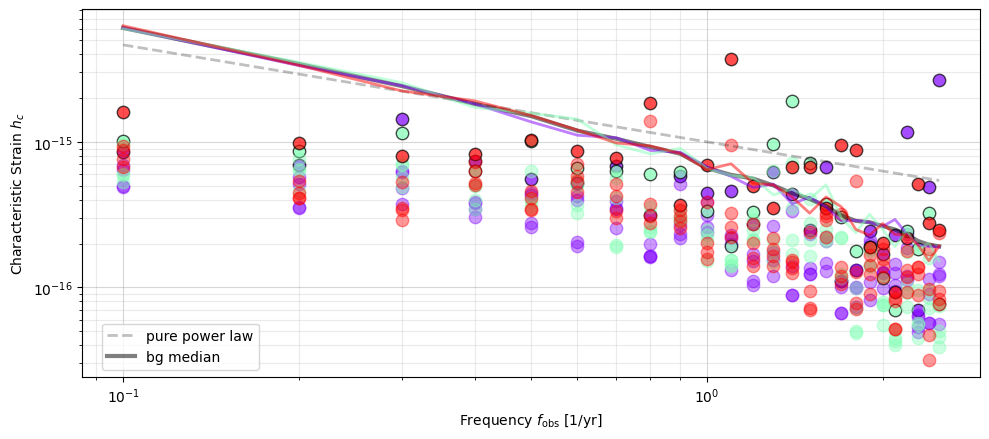

In [12]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])

xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the median background
ax.plot(xx, np.median(hc_bg, axis=1), label='bg median', color='k', lw=3, alpha=.5)

# plot all single sources in the first realization
REALS = 3
colors = cm.rainbow(np.linspace(0,1,REALS))
for rr in range(REALS):
    ax.plot(xx, hc_bg[:,rr], lw=2.0, alpha=0.5, color=colors[rr], linestyle='solid')
    for ll in range(len(hc_ls[0,0])):
        if(ll==0): 
            edgecolor = 'k'
            alpha = 0.7
        else: 
            edgecolor = None
            alpha = 0.4
        ax.scatter(xx,hc_ls[:,rr,ll], color=colors[rr], marker='o', s=80,
                    edgecolor=edgecolor, alpha=alpha)

# plot the model with Poisson sampling
# ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], REALS=1, COLOR='b')


legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()

In [ ]:
def plot_samples(ax, xx, BG=None, SS=None, REALS=1, LABEL=''):
    """
    Plot the background and/or single sources for the first 'REALS' 
    number of realizations, with each color corresponding to a difference 
    realization.

    Parameters
    ----------
    ax : pyplot ax object
    xx : (F,) array of scalars
    BG : (F,R) ndarray or None
    SS : (F,R) ndarray or None
    REALS : int
    """
    colors = cm.rainbow(np.linspace(0,1,REALS))
    for rr in range(REALS):
        if rr==REALS-1:
            if(BG is not None):
                ax.plot(xx, BG[:,rr], lw=2.0, alpha=0.5, color=colors[rr], linestyle='solid',
                    label='background'+LABEL)
            if(SS is not None):
                ax.scatter(xx, SS[:,rr], color=colors[rr], marker='o', s=80,
                    edgecolor='k', alpha=0.5, label='single source'+LABEL)
        else:
            if(BG is not None):
                ax.plot(xx, BG[:,rr], lw=2.0, alpha=0.5, color=colors[rr], linestyle='solid')
            if(SS is not None):
                ax.scatter(xx, SS[:,rr], color=colors[rr], marker='o', s=80,
                    edgecolor='k', alpha=0.5)

In [ ]:
fig, ax = plot.figax(xlabel='Frequency $f_\mathrm{obs}$ [1/yr]', 
                    ylabel='Characteristic Strain $h_c$', figsize=[10,4.5])

xx = fobs * YR

# plot a reference, pure power-law  strain spectrum:   h_c(f) = 1e-15 * (f * yr) ^ -2/3
yy = 1e-15 * np.power(xx, -2.0/3.0)
ax.plot(xx, yy, 'k--', alpha=0.25, lw=2.0, label = 'pure power law')

# plot the model without sampling
hc_bg_exp = ss.ss_by_cdefs(edges, number, realize=False, round=False)[0]
ax.plot(xx, hc_bg_exp, color='k', lw=4, ls = 'dotted', label='unsampled background')

# plot the model with Poisson sampling
# ss.plot_BG(ax, xx, hc_bg, LABEL='hc_bg, median of %d realizations'% hc_bg.shape[1], REALS=1, COLOR='b')
ss.plot_samples(ax, xx, hc_bg, hc_ss, REALS=5)

legend_gwb = ax.legend(bbox_to_anchor=(.1,.15), bbox_transform=fig.transFigure, loc='lower left')
fig.tight_layout()